In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns


###  to do
# Figure out states at large
# Split out NYC, KC, Joplin into counties
# animation?

In [30]:
mask_use_file = '../covid-19-data/mask-use/mask-use-by-county.csv'
excess_deaths_file = '../covid-19-data/excess-deaths/deaths.csv'
colleges_file = '../covid-19-data/colleges/colleges.csv'
US_live_file = '../covid-19-data/live/us.csv'
US_live_counties_file = '../covid-19-data/live/us-counties.csv'
US_live_states_file = '../covid-19-data/live/us-states.csv'
US_file = '../covid-19-data/us.csv'
US_counties_file = '../covid-19-data/us-counties.csv'
US_states_file = '../covid-19-data/us-states.csv'
US_state_policy_file = 'state_policy_updates_20201202_0721.csv'
US_county_population_file = 'co-est2019-alldata.csv'
US_county_land_file = 'LND01.csv'
US_county_vote_file = 'president_county_candidate.csv'
US_county_income_file = 'SAIPE2018.csv'
US_county_popdata_file = 'popData.csv'

In [31]:
mask_use_DF = pd.read_csv(mask_use_file)
excess_deaths_DF = pd.read_csv(excess_deaths_file)
colleges_DF = pd.read_csv(colleges_file)
US_DF = pd.read_csv(US_file)
US_counties_DF = pd.read_csv(US_counties_file)
US_states_DF = pd.read_csv(US_states_file)
US_live_DF = pd.read_csv(US_live_file)
US_live_counties_DF = pd.read_csv(US_live_counties_file)
US_live_states_DF = pd.read_csv(US_live_states_file)
US_state_policy_DF = pd.read_csv(US_state_policy_file)
US_county_population_DF = pd.read_csv(US_county_population_file, encoding = "ISO-8859-1")
US_county_land_DF = pd.read_csv(US_county_land_file)
US_county_vote_DF = pd.read_csv(US_county_vote_file)
US_county_income_DF = pd.read_csv(US_county_income_file)
US_county_popdata_DF = pd.read_csv(US_county_popdata_file)

In [4]:
excess_deaths_DF[excess_deaths_DF.country == 'United States']

,country,placename,frequency,start_date,end_date,year,month,week,deaths,expected_deaths,excess_deaths,baseline
1459,United States,NaN,weekly,2020-01-06,2020-01-12,2020,1,2.0,60691,60628.0,63.0,2017-2019 historical data
1460,United States,NaN,weekly,2020-01-13,2020-01-19,2020,1,3.0,59338,60023.0,-685.0,2017-2019 historical data
1461,United States,NaN,weekly,2020-01-20,2020-01-26,2020,1,4.0,59104,59872.0,-768.0,2017-2019 historical data
1462,United States,NaN,weekly,2020-01-27,2020-02-02,2020,2,5.0,58763,60412.0,-1649.0,2017-2019 historical data
1463,United States,NaN,weekly,2020-02-03,2020-02-09,2020,2,6.0,59328,60073.0,-745.0,2017-2019 historical data
...,...,...,...,...,...,...,...,...,...,...,...,...
1541,United States,NaN,weekly,NaN,NaN,2017-2019 average,11,47.0,55082,NaN,NaN,NaN
1542,United States,NaN,weekly,NaN,NaN,2017-2019 average,12,48.0,55872,NaN,NaN,NaN
1543,United States,NaN,weekly,NaN,NaN,2017-2019 average,12,49.0,56832,NaN,NaN,NaN
1544,United States,NaN,weekly,NaN,NaN,2017-2019 average,12,50.0,57866,NaN,NaN,NaN


In [5]:
mask_use_DF['mask_pct'] = mask_use_DF['FREQUENTLY'] + mask_use_DF['ALWAYS']
mask_use_DF

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,mask_pct
0,1001,0.053,0.074,0.134,0.295,0.444,0.739
1,1003,0.083,0.059,0.098,0.323,0.436,0.759
2,1005,0.067,0.121,0.120,0.201,0.491,0.692
3,1007,0.020,0.034,0.096,0.278,0.572,0.850
4,1009,0.053,0.114,0.180,0.194,0.459,0.653
...,...,...,...,...,...,...,...
3137,56037,0.061,0.295,0.230,0.146,0.268,0.414
3138,56039,0.095,0.157,0.160,0.247,0.340,0.587
3139,56041,0.098,0.278,0.154,0.207,0.264,0.471
3140,56043,0.204,0.155,0.069,0.285,0.287,0.572


In [6]:
colleges_DF

,date,state,county,city,ipeds_id,college,cases,notes
0,2020-11-19,Alabama,Madison,Huntsville,100654.0,Alabama A&M University,41.0,NaN
1,2020-11-19,Alabama,Montgomery,Montgomery,100724.0,Alabama State University,2.0,NaN
2,2020-11-19,Alabama,Limestone,Athens,100812.0,Athens State University,33.0,NaN
3,2020-11-19,Alabama,Lee,Auburn,100858.0,Auburn University,2079.0,NaN
4,2020-11-19,Alabama,Montgomery,Montgomery,100830.0,Auburn University at Montgomery,101.0,NaN
...,...,...,...,...,...,...,...,...
1903,2020-11-19,Wisconsin,Milwaukee,Milwaukee,240338.0,Wisconsin Lutheran College,58.0,NaN
1904,2020-11-19,Wyoming,Natrona,Casper,240505.0,Casper College,249.0,NaN
1905,2020-11-19,Wyoming,Goshen,Torrington,240596.0,Eastern Wyoming College,10.0,NaN
1906,2020-11-19,Wyoming,Albany,Laramie,240727.0,University of Wyoming,1597.0,NaN


In [7]:
US_DF

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0
...,...,...,...
313,2020-11-29,13448002,266758
314,2020-11-30,13615806,268023
315,2020-12-01,13800086,270633
316,2020-12-02,14000558,273518


In [24]:
US_counties_DF[US_counties_DF.date == '2020-11-02']

,date,county,state,fips,cases,deaths
690099,2020-11-02,Autauga,Alabama,1001.0,2186,31.0
690100,2020-11-02,Baldwin,Alabama,1003.0,6985,71.0
690101,2020-11-02,Barbour,Alabama,1005.0,1065,9.0
690102,2020-11-02,Bibb,Alabama,1007.0,883,15.0
690103,2020-11-02,Blount,Alabama,1009.0,2108,25.0
...,...,...,...,...,...,...
693337,2020-11-02,Sweetwater,Wyoming,56037.0,601,2.0
693338,2020-11-02,Teton,Wyoming,56039.0,847,1.0
693339,2020-11-02,Uinta,Wyoming,56041.0,492,3.0
693340,2020-11-02,Washakie,Wyoming,56043.0,159,7.0


In [9]:
US_states_DF

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
15189,2020-12-03,Virginia,51,244503,4147
15190,2020-12-03,Washington,53,180125,3040
15191,2020-12-03,West Virginia,54,51025,789
15192,2020-12-03,Wisconsin,55,426534,3781


In [10]:
US_live_DF

,date,cases,deaths,confirmed_cases,confirmed_deaths,probable_cases,probable_deaths
0,2020-12-04,14217106,276375,NaN,NaN,NaN,NaN


In [11]:
US_live_counties_DF.county

0          Autauga
1          Baldwin
2          Barbour
3             Bibb
4           Blount
           ...    
3241    Sweetwater
3242         Teton
3243         Uinta
3244      Washakie
3245        Weston
Name: county, Length: 3246, dtype: object

In [48]:
US_live_counties_DF[US_live_counties_DF.fips.isnull()]

# Joplin - Jasper and Newton Counties 29097 and 29145
# KC - 20209, 29095, 29165, 29047, 29037
# NYC - 36047, 36005, 36061, 36081, 36085

,date,county,state,fips,cases,deaths,confirmed_cases,confirmed_deaths,probable_cases,probable_deaths
91,2020-12-04,Unknown,Alaska,NaN,279,0.0,0.0,0.0,279.0,NaN
180,2020-12-04,Unknown,Arkansas,NaN,2584,0.0,2159.0,0.0,425.0,0.0
315,2020-12-04,Unknown,Connecticut,NaN,801,1.0,732.0,0.0,69.0,1.0
320,2020-12-04,Unknown,Delaware,NaN,94,0.0,88.0,NaN,6.0,NaN
385,2020-12-04,Unknown,Florida,NaN,2869,0.0,NaN,0.0,NaN,NaN
534,2020-12-04,Unknown,Georgia,NaN,2719,1.0,2201.0,1.0,518.0,0.0
550,2020-12-04,Unknown,Guam,NaN,7911,113.0,7771.0,113.0,140.0,0.0
881,2020-12-04,Unknown,Iowa,NaN,709,0.0,709.0,0.0,NaN,NaN
991,2020-12-04,Unknown,Kansas,NaN,0,100.0,NaN,NaN,NaN,NaN
1175,2020-12-04,Unknown,Louisiana,NaN,401,0.0,398.0,0.0,3.0,0.0


In [13]:
US_state_policy_DF[US_state_policy_DF.policy_type == 'Mask Requirement']

,state_id,county,fips_code,policy_level,date,policy_type,start_stop,comments,source,total_phases
1,TX,Kinney,48271.0,county,2020-07-03,Mask Requirement,start,Policy_Details: County is approved to be exemp...,sip_submission_form: https://tdem.texas.gov/ga...,NaN
4,TX,Borden,48033.0,county,2020-07-03,Mask Requirement,start,Policy_Details: County is approved to be exemp...,sip_submission_form: https://tdem.texas.gov/ga...,NaN
15,TX,Archer,48009.0,county,2020-07-03,Mask Requirement,start,Policy_Details: County is approved to be exemp...,sip_submission_form: https://tdem.texas.gov/ga...,NaN
16,UT,Millard,49027.0,county,2020-11-24,Mask Requirement,start,Policy_Details: Masks required Source infor...,sip_submission_form: https://coronavirus.utah....,3.0
28,ID,Caribou,16029.0,county,2020-10-27,Mask Requirement,start,Policy_Details: Masks required in a public set...,sip_submission_form: https://coronavirus.idaho...,4.0
...,...,...,...,...,...,...,...,...,...,...
3595,TX,Knox,48275.0,county,2020-07-03,Mask Requirement,start,Policy_Details: County is approved to be exemp...,sip_submission_form: https://tdem.texas.gov/ga...,NaN
3601,OH,Wood,39173.0,county,2020-07-10,Mask Requirement,start,Policy_Details: face coverings required in any...,sip_submission_form: https://coronavirus.ohio....,NaN
3616,GA,NaN,NaN,state,2020-09-30,Mask Requirement,stop,Policy_Details: Governor Brian Kemp issued Exe...,sip_submission_form: https://gov.georgia.gov/e...,NaN
3696,CO,NaN,NaN,state,2020-08-16,Mask Requirement,stop,Policy_Details: Governor Polis issued EO D 202...,sip_submission_form: https://www.colorado.gov/...,NaN


In [14]:
US_county_land_DF

,Areaname,STCOU,LND010190F,LND010190D,LND010190N1,LND010190N2,LND010200F,LND010200D,LND010200N1,LND010200N2,...,LND110210N1,LND110210N2,LND210190F,LND210190D,LND210190N1,LND210190N2,LND210200F,LND210200D,LND210200N1,LND210200N2
0,UNITED STATES,0,0,3787425.08,0,0,0,3794083.06,0,0,...,0,0,0,251083.35,0,0,0,256644.62,0,0
1,ALABAMA,1000,0,52422.94,0,0,0,52419.02,0,0,...,0,0,0,1672.71,0,0,0,1675.01,0,0
2,"Autauga, AL",1001,0,604.49,0,0,0,604.45,0,0,...,0,0,0,8.48,0,0,0,8.48,0,0
3,"Baldwin, AL",1003,0,2027.08,0,0,0,2026.93,0,0,...,0,0,0,430.55,0,0,0,430.58,0,0
4,"Barbour, AL",1005,0,904.59,0,0,0,904.52,0,0,...,0,0,0,19.59,0,0,0,19.61,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3193,"Sweetwater, WY",56037,0,10491.73,0,0,0,10491.17,0,0,...,0,0,0,65.86,0,0,0,65.87,0,0
3194,"Teton, WY",56039,0,4221.96,0,0,0,4221.80,0,0,...,0,0,0,214.02,0,0,0,214.04,0,0
3195,"Uinta, WY",56041,0,2087.66,0,0,0,2087.56,0,0,...,0,0,0,5.91,0,0,0,5.90,0,0
3196,"Washakie, WY",56043,0,2242.85,0,0,0,2242.75,0,0,...,0,0,0,2.69,0,0,0,2.69,0,0


In [15]:
US_county_vote_DF

,state,county,candidate,party,total_votes,won
0,Delaware,Kent County,Joe Biden,DEM,44552,True
1,Delaware,Kent County,Donald Trump,REP,41009,False
2,Delaware,Kent County,Jo Jorgensen,LIB,1044,False
3,Delaware,Kent County,Howie Hawkins,GRN,420,False
4,Delaware,New Castle County,Joe Biden,DEM,195034,True
...,...,...,...,...,...,...
31810,Arizona,Maricopa County,Write-ins,WRI,1331,False
31811,Arizona,Mohave County,Donald Trump,REP,78535,True
31812,Arizona,Mohave County,Joe Biden,DEM,24831,False
31813,Arizona,Mohave County,Jo Jorgensen,LIB,1302,False


In [16]:
US_county_population_DF

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2019,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019
0,40,3,6,1,0,Alabama,Alabama,4779736,4780125,4785437,...,1.917501,0.578434,1.186314,1.522549,0.563489,0.626357,0.745172,1.090366,1.773786,2.483744
1,50,3,6,1,1,Alabama,Autauga County,54571,54597,54773,...,4.847310,6.018182,-6.226119,-3.902226,1.970443,-1.712875,4.777171,0.849656,0.540916,4.560062
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183112,...,24.017829,16.641870,17.488579,22.751474,20.184334,17.725964,21.279291,22.398256,24.727215,24.380567
3,50,3,6,1,5,Alabama,Barbour County,27457,27455,27327,...,-5.690302,0.292676,-6.897817,-8.132185,-5.140431,-15.724575,-18.238016,-24.998528,-8.754922,-5.165664
4,50,3,6,1,7,Alabama,Bibb County,22915,22915,22870,...,1.385134,-4.998356,-3.787545,-5.797999,1.331144,1.329817,-0.708717,-3.234669,-6.857092,1.831952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,50,4,8,56,37,Wyoming,Sweetwater County,43806,43806,43574,...,-17.605427,0.502513,15.035735,-4.614071,-13.140225,-13.762031,-18.484164,-23.515727,-18.743773,-17.065527
3189,50,4,8,56,39,Wyoming,Teton County,21294,21298,21296,...,-1.583464,-2.575509,1.905293,23.259519,12.508872,4.670450,1.253214,-0.171608,-12.432212,1.797445
3190,50,4,8,56,41,Wyoming,Uinta County,21118,21121,21089,...,-9.181105,-18.196975,-4.487730,-10.870861,-15.033634,-10.484550,-11.485101,-18.923455,-13.554993,-9.181105
3191,50,4,8,56,43,Wyoming,Washakie County,8533,8528,8530,...,-7.652085,-12.839390,-3.084589,-1.307811,-18.938032,0.000000,-15.204038,-15.950541,-17.246806,-8.289759


In [17]:
US_county_income_DF

,Table with column headers in rows 3 and 4,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,2018 Poverty and Median Household Income Estim...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Geographic Information,NaN,NaN,NaN,All Ages,NaN,NaN,NaN,NaN,NaN,...,NaN,Median Household Income,NaN,NaN,Age 0-4,NaN,NaN,NaN,NaN,NaN
2,State FIPS Code,County FIPS Code,Postal Code,Name,"Poverty Estimate, All Ages",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, All Ages",90% CI Lower Bound,90% CI Upper Bound,...,90% CI Upper Bound,Median Household Income,90% CI Lower Bound,90% CI Upper Bound,"Poverty Estimate, Age 0-4",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, Age 0-4",90% CI Lower Bound,90% CI Upper Bound
3,00,000,US,United States,"41,852,315","41,619,366","42,085,264",13.1,13.0,13.2,...,17.2,"61,937","61,843","62,031","3,758,704","3,714,862","3,802,546",19.5,19.3,19.7
4,01,000,AL,Alabama,"801,758","785,668","817,848",16.8,16.5,17.1,...,23.7,"49,881","49,123","50,639","73,915","69,990","77,840",26.0,24.6,27.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,56,037,WY,Sweetwater County,"3,540","2,804","4,276",8.4,6.7,10.1,...,11.2,"73,315","67,141","79,489",.,.,.,.,.,.
3193,56,039,WY,Teton County,"1,443","1,137","1,749",6.3,5.0,7.6,...,7.7,"99,087","88,142","110,032",.,.,.,.,.,.
3194,56,041,WY,Uinta County,"2,010","1,585","2,435",10.0,7.9,12.1,...,14.0,"63,401","56,812","69,990",.,.,.,.,.,.
3195,56,043,WY,Washakie County,918,700,"1,136",11.9,9.1,14.7,...,19.3,"55,190","49,263","61,117",.,.,.,.,.,.


In [18]:
Biden = US_county_vote_DF[US_county_vote_DF.candidate == 'Joe Biden']
trump = US_county_vote_DF[US_county_vote_DF.candidate == 'Donald Trump']
Vote_Data = Biden[['state', 'county', 'total_votes']].copy()


Vote_Data.rename(columns={'total_votes':'Biden'}, inplace=True)
Vote_Data['Trump'] = trump.total_votes.to_numpy()

# Different databases store county names differently, this removes the word county to match.
Vote_Data.county = Vote_Data.county.replace({' County':''}, regex=True)


df = pd.merge(US_live_counties_DF, Vote_Data, left_on = ['county','state'], right_on = ['county','state'])
df

,date,county,state,fips,cases,deaths,confirmed_cases,confirmed_deaths,probable_cases,probable_deaths,Biden,Trump
0,2020-12-04,Autauga,Alabama,1001.0,2893,42.0,2577.0,37.0,316.0,5.0,7503,19838
1,2020-12-04,Baldwin,Alabama,1003.0,9341,137.0,7488.0,103.0,1853.0,34.0,24578,83544
2,2020-12-04,Barbour,Alabama,1005.0,1214,29.0,787.0,24.0,427.0,5.0,4816,5622
3,2020-12-04,Bibb,Alabama,1007.0,1252,38.0,1115.0,22.0,137.0,16.0,1986,7525
4,2020-12-04,Blount,Alabama,1009.0,3158,45.0,2331.0,42.0,827.0,3.0,2640,24711
...,...,...,...,...,...,...,...,...,...,...,...,...
3015,2020-12-04,Sweetwater,Wyoming,56037.0,2024,10.0,1941.0,NaN,83.0,NaN,3823,12229
3016,2020-12-04,Teton,Wyoming,56039.0,1693,2.0,1645.0,NaN,48.0,NaN,9848,4341
3017,2020-12-04,Uinta,Wyoming,56041.0,1149,5.0,943.0,NaN,206.0,NaN,1591,7496
3018,2020-12-04,Washakie,Wyoming,56043.0,496,8.0,404.0,NaN,92.0,NaN,651,3245


In [19]:
df['Biden_pct'] = df['Biden']/(df['Trump']+df['Biden'])

In [23]:
df.fips = df.fips.astype('int')
df

,date,county,state,fips,cases,deaths,confirmed_cases,confirmed_deaths,probable_cases,probable_deaths,Biden,Trump,Biden_pct
0,2020-12-04,Autauga,Alabama,1001,2893,42.0,2577.0,37.0,316.0,5.0,7503,19838,0.274423
1,2020-12-04,Baldwin,Alabama,1003,9341,137.0,7488.0,103.0,1853.0,34.0,24578,83544,0.227317
2,2020-12-04,Barbour,Alabama,1005,1214,29.0,787.0,24.0,427.0,5.0,4816,5622,0.461391
3,2020-12-04,Bibb,Alabama,1007,1252,38.0,1115.0,22.0,137.0,16.0,1986,7525,0.208811
4,2020-12-04,Blount,Alabama,1009,3158,45.0,2331.0,42.0,827.0,3.0,2640,24711,0.096523
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3015,2020-12-04,Sweetwater,Wyoming,56037,2024,10.0,1941.0,NaN,83.0,NaN,3823,12229,0.238163
3016,2020-12-04,Teton,Wyoming,56039,1693,2.0,1645.0,NaN,48.0,NaN,9848,4341,0.694059
3017,2020-12-04,Uinta,Wyoming,56041,1149,5.0,943.0,NaN,206.0,NaN,1591,7496,0.175085
3018,2020-12-04,Washakie,Wyoming,56043,496,8.0,404.0,NaN,92.0,NaN,651,3245,0.167094


In [27]:
df = pd.merge(df, mask_use_DF[['COUNTYFP','mask_pct']], left_on = 'fips', right_on = 'COUNTYFP')
df

,date,county,state,fips,cases,deaths,confirmed_cases,confirmed_deaths,probable_cases,probable_deaths,Biden,Trump,Biden_pct,COUNTYFP,mask_pct
0,2020-12-04,Autauga,Alabama,1001,2893,42.0,2577.0,37.0,316.0,5.0,7503,19838,0.274423,1001,0.739
1,2020-12-04,Baldwin,Alabama,1003,9341,137.0,7488.0,103.0,1853.0,34.0,24578,83544,0.227317,1003,0.759
2,2020-12-04,Barbour,Alabama,1005,1214,29.0,787.0,24.0,427.0,5.0,4816,5622,0.461391,1005,0.692
3,2020-12-04,Bibb,Alabama,1007,1252,38.0,1115.0,22.0,137.0,16.0,1986,7525,0.208811,1007,0.850
4,2020-12-04,Blount,Alabama,1009,3158,45.0,2331.0,42.0,827.0,3.0,2640,24711,0.096523,1009,0.653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3015,2020-12-04,Sweetwater,Wyoming,56037,2024,10.0,1941.0,NaN,83.0,NaN,3823,12229,0.238163,56037,0.414
3016,2020-12-04,Teton,Wyoming,56039,1693,2.0,1645.0,NaN,48.0,NaN,9848,4341,0.694059,56039,0.587
3017,2020-12-04,Uinta,Wyoming,56041,1149,5.0,943.0,NaN,206.0,NaN,1591,7496,0.175085,56041,0.471
3018,2020-12-04,Washakie,Wyoming,56043,496,8.0,404.0,NaN,92.0,NaN,651,3245,0.167094,56043,0.572


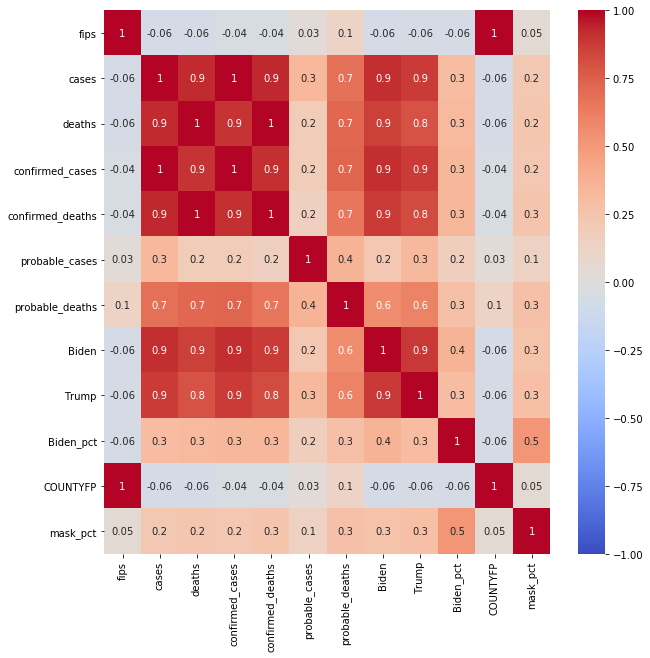

In [26]:
mask_use_DF[['COUNTYFP','mask_pct']]

,COUNTYFP,mask_pct
0,1001,0.739
1,1003,0.759
2,1005,0.692
3,1007,0.850
4,1009,0.653
...,...,...
3137,56037,0.414
3138,56039,0.587
3139,56041,0.471
3140,56043,0.572


In [35]:
df = pd.merge(df, US_county_popdata_DF[['FIPS', 'Poverty Percent', 'POPESTIMATE2018']], left_on = 'fips', right_on = 'FIPS')

,date,county,state,fips,cases,deaths,confirmed_cases,confirmed_deaths,probable_cases,probable_deaths,Biden,Trump,Biden_pct,COUNTYFP,mask_pct,FIPS,Poverty Percent,POPESTIMATE2018
0,2020-12-04,Autauga,Alabama,1001,2893,42.0,2577.0,37.0,316.0,5.0,7503,19838,0.274423,1001,0.739,1001,13.8,55533
1,2020-12-04,Baldwin,Alabama,1003,9341,137.0,7488.0,103.0,1853.0,34.0,24578,83544,0.227317,1003,0.759,1003,9.8,217855
2,2020-12-04,Barbour,Alabama,1005,1214,29.0,787.0,24.0,427.0,5.0,4816,5622,0.461391,1005,0.692,1005,30.9,24872
3,2020-12-04,Bibb,Alabama,1007,1252,38.0,1115.0,22.0,137.0,16.0,1986,7525,0.208811,1007,0.850,1007,21.8,22367
4,2020-12-04,Blount,Alabama,1009,3158,45.0,2331.0,42.0,827.0,3.0,2640,24711,0.096523,1009,0.653,1009,13.2,57771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3015,2020-12-04,Sweetwater,Wyoming,56037,2024,10.0,1941.0,NaN,83.0,NaN,3823,12229,0.238163,56037,0.414,56037,8.4,42858
3016,2020-12-04,Teton,Wyoming,56039,1693,2.0,1645.0,NaN,48.0,NaN,9848,4341,0.694059,56039,0.587,56039,6.3,23269
3017,2020-12-04,Uinta,Wyoming,56041,1149,5.0,943.0,NaN,206.0,NaN,1591,7496,0.175085,56041,0.471,56041,10.0,20292
3018,2020-12-04,Washakie,Wyoming,56043,496,8.0,404.0,NaN,92.0,NaN,651,3245,0.167094,56043,0.572,56043,11.9,7877


In [38]:
df

,date,county,state,fips,cases,deaths,confirmed_cases,confirmed_deaths,probable_cases,probable_deaths,Biden,Trump,Biden_pct,COUNTYFP,mask_pct,FIPS,Poverty Percent,POPESTIMATE2018
0,2020-12-04,Autauga,Alabama,1001,2893,42.0,2577.0,37.0,316.0,5.0,7503,19838,0.274423,1001,0.739,1001,13.8,55533
1,2020-12-04,Baldwin,Alabama,1003,9341,137.0,7488.0,103.0,1853.0,34.0,24578,83544,0.227317,1003,0.759,1003,9.8,217855
2,2020-12-04,Barbour,Alabama,1005,1214,29.0,787.0,24.0,427.0,5.0,4816,5622,0.461391,1005,0.692,1005,30.9,24872
3,2020-12-04,Bibb,Alabama,1007,1252,38.0,1115.0,22.0,137.0,16.0,1986,7525,0.208811,1007,0.850,1007,21.8,22367
4,2020-12-04,Blount,Alabama,1009,3158,45.0,2331.0,42.0,827.0,3.0,2640,24711,0.096523,1009,0.653,1009,13.2,57771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3015,2020-12-04,Sweetwater,Wyoming,56037,2024,10.0,1941.0,NaN,83.0,NaN,3823,12229,0.238163,56037,0.414,56037,8.4,42858
3016,2020-12-04,Teton,Wyoming,56039,1693,2.0,1645.0,NaN,48.0,NaN,9848,4341,0.694059,56039,0.587,56039,6.3,23269
3017,2020-12-04,Uinta,Wyoming,56041,1149,5.0,943.0,NaN,206.0,NaN,1591,7496,0.175085,56041,0.471,56041,10.0,20292
3018,2020-12-04,Washakie,Wyoming,56043,496,8.0,404.0,NaN,92.0,NaN,651,3245,0.167094,56043,0.572,56043,11.9,7877


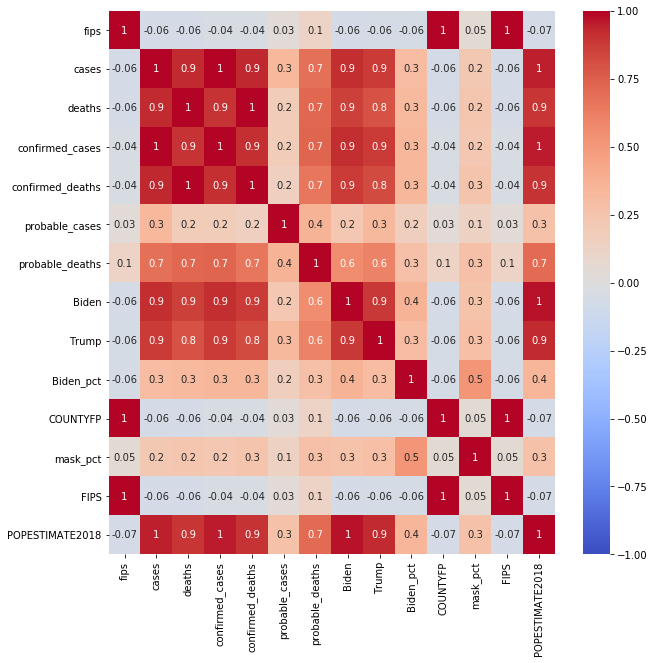

In [40]:
df.columns

Index(['date', 'county', 'state', 'fips', 'cases', 'deaths', 'confirmed_cases',
       'confirmed_deaths', 'probable_cases', 'probable_deaths', 'Biden',
       'Trump', 'Biden_pct', 'COUNTYFP', 'mask_pct', 'FIPS', 'Poverty Percent',
       'POPESTIMATE2018'],
      dtype='object')

In [41]:
df = df[['date', 'county', 'state', 'fips', 'cases', 'deaths', 
       'Biden', 'Trump', 'Biden_pct', 'mask_pct', 'Poverty Percent',
       'POPESTIMATE2018']]

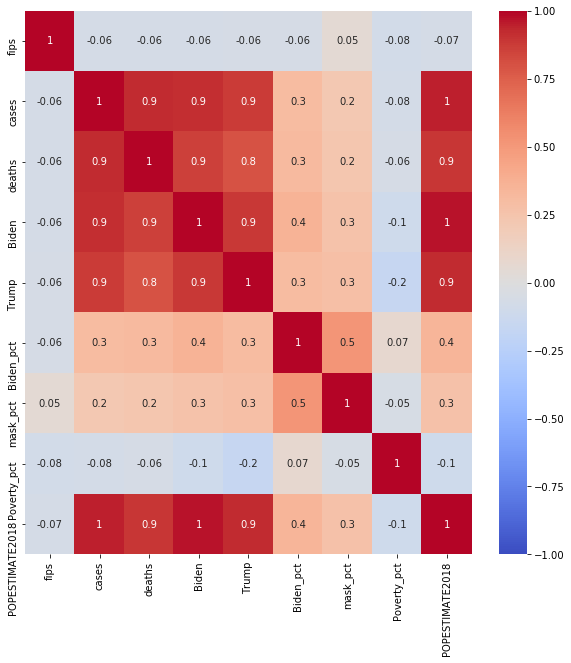

In [53]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot = True, fmt = '0.1g', cmap = 'coolwarm', vmin=-1)

In [45]:
df.rename(columns = {'Poverty Percent':'Poverty_pct'}, inplace=True)
df

C:\Users\Ian\Anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,date,county,state,fips,cases,deaths,Biden,Trump,Biden_pct,mask_pct,Poverty_pct,POPESTIMATE2018
0,2020-12-04,Autauga,Alabama,1001,2893,42.0,7503,19838,0.274423,0.739,13.8,55533
1,2020-12-04,Baldwin,Alabama,1003,9341,137.0,24578,83544,0.227317,0.759,9.8,217855
2,2020-12-04,Barbour,Alabama,1005,1214,29.0,4816,5622,0.461391,0.692,30.9,24872
3,2020-12-04,Bibb,Alabama,1007,1252,38.0,1986,7525,0.208811,0.850,21.8,22367
4,2020-12-04,Blount,Alabama,1009,3158,45.0,2640,24711,0.096523,0.653,13.2,57771
...,...,...,...,...,...,...,...,...,...,...,...,...
3015,2020-12-04,Sweetwater,Wyoming,56037,2024,10.0,3823,12229,0.238163,0.414,8.4,42858
3016,2020-12-04,Teton,Wyoming,56039,1693,2.0,9848,4341,0.694059,0.587,6.3,23269
3017,2020-12-04,Uinta,Wyoming,56041,1149,5.0,1591,7496,0.175085,0.471,10.0,20292
3018,2020-12-04,Washakie,Wyoming,56043,496,8.0,651,3245,0.167094,0.572,11.9,7877


In [51]:
df.Poverty_pct = df.Poverty_pct.astype('float')

C:\Users\Ian\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [52]:
df.corr()

,fips,cases,deaths,Biden,Trump,Biden_pct,mask_pct,Poverty_pct,POPESTIMATE2018
fips,1.000000,-0.063052,-0.063317,-0.062843,-0.057521,-0.061173,0.052299,-0.082330,-0.065716
cases,-0.063052,1.000000,0.924038,0.914418,0.881921,0.309857,0.218783,-0.077101,0.951504
deaths,-0.063317,0.924038,1.000000,0.862180,0.804298,0.312980,0.234808,-0.058485,0.895312
Biden,-0.062843,0.914418,0.862180,1.000000,0.882863,0.362652,0.258826,-0.102631,0.971907
Trump,-0.057521,0.881921,0.804298,0.882863,1.000000,0.312429,0.288879,-0.163560,0.927386
Biden_pct,-0.061173,0.309857,0.312980,0.362652,0.312429,1.000000,0.522429,0.070694,0.350299
mask_pct,0.052299,0.218783,0.234808,0.258826,0.288879,0.522429,1.000000,-0.054103,0.270086
Poverty_pct,-0.082330,-0.077101,-0.058485,-0.102631,-0.163560,0.070694,-0.054103,1.000000,-0.106236
POPESTIMATE2018,-0.065716,0.951504,0.895312,0.971907,0.927386,0.350299,0.270086,-0.106236,1.000000


In [55]:
df[df.fips == 29095]

,date,county,state,fips,cases,deaths,Biden,Trump,Biden_pct,mask_pct,Poverty_pct,POPESTIMATE2018
1423,2020-12-04,Jackson,Missouri,29095,18081,185.0,199842,126535,0.612304,0.819,13.0,700784
